<a href="https://colab.research.google.com/github/williamliu91/GitHubColab/blob/main/LogisticRegress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [ ]:
np.random.seed(0)
num_samples = 1000

# Generate random credit scores (ranging from 300 to 850)
credit_scores = np.random.randint(300, 851, num_samples)

# Generate random annual incomes (ranging from $20,000 to $120,000)
annual_incomes = np.random.randint(20000, 120001, num_samples)

# Create a DataFrame
data = pd.DataFrame({'Credit_Score': credit_scores,
                     'Annual_Income': annual_incomes})

# Assign labels based on a simple rule: If Credit_Score > 600 and Annual_Income > $50,000, then no default (0), else default (1)
data['Default'] = np.where((data['Credit_Score'] > 600) & (data['Annual_Income'] > 50000), 0, 1)



In [ ]:
print(data.head())


   Credit_Score  Annual_Income  Default
0           492         103245        1
1           659          93828        0
2           309         106352        1
3           577          81552        1
4           370          74137        1


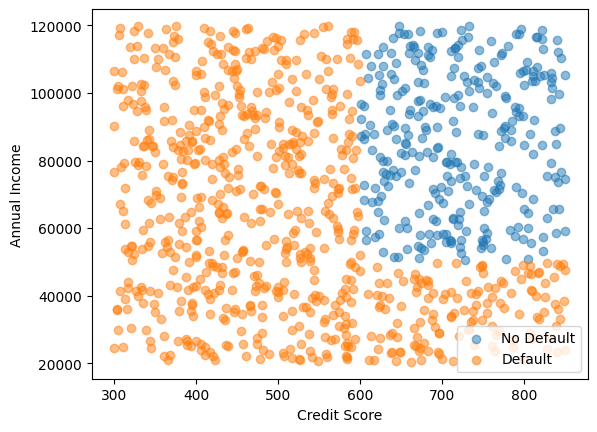

In [ ]:
plt.scatter(data[data['Default'] == 0]['Credit_Score'], data[data['Default'] == 0]['Annual_Income'], label='No Default', alpha=0.5)
plt.scatter(data[data['Default'] == 1]['Credit_Score'], data[data['Default'] == 1]['Annual_Income'], label='Default', alpha=0.5)
plt.xlabel('Credit Score')
plt.ylabel('Annual Income')
plt.legend()
plt.show()



In [ ]:
X = data[['Credit_Score', 'Annual_Income']]
y = data['Default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)



LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')



Accuracy: 0.875
Confusion Matrix:
[[ 41  15]
 [ 10 134]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.73      0.77        56
           1       0.90      0.93      0.91       144

    accuracy                           0.88       200
   macro avg       0.85      0.83      0.84       200
weighted avg       0.87      0.88      0.87       200

